# <center> Interference using Ultrasound wave sources

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import sys
from matplotlib.animation import FuncAnimation
from matplotlib import animation

### Ultrasound Interference
In this simulation, two in-phase ultrasound wave sources with a frequency of $40 \times 10^3$ Hz are used to demonstrate the interference phenomenon of waves. A receiver is placed at a distance of $0.8$ m from the sources, and the sources are separated by a distance of $40 \times 10^{-3}$ m. The intensity of waves from the sources decreases with radial distance, following the inverse square law ($1/r^2$). The resulting bright and dark fringes of the interference pattern have been measured and compared with this simulation.

In [19]:
f = 40*10**3           # frequency in Hertz for period of wave = 2.5e-05
wave_len = 8.25*10**-3    # wavelength in meters
w = 2*np.pi*f          # angular frequency in radians 
k = 2*np.pi/wave_len          # wave number
left_pos = 0
right_pos = 0.9
top_pos = 0.6
bottom_pos = 0
source_1y = 0.3+40*10**-3
source_2y = 0.3
source_1x = 0.1
source_2x = 0.1

dx = np.arange(left_pos, right_pos , 0.002)  # Setting 2D-grid
dy = np.arange(bottom_pos, top_pos , 0.002)
x, y = np.meshgrid(dx, dy)
s_grid = np.zeros([100, 300, 450])
t = np.linspace(0, 10*2.5e-05, 100)         # time array  
np.seterr(invalid='ignore')                # to ingnore the 'invalid' message in Numpy

for i in range(100):
    
    s_grid[i] = (1/((source_1x - x)**2+(source_1y - y)**2))*np.sin(k*np.sqrt((source_1x - x)**2+(source_1y - y)**2) - w*t[i])  \
    + (1/((source_2x - x)**2+(source_2y - y)**2))*np.sin(k*np.sqrt((source_2x - x)**2+(source_2y - y)**2) - w*t[i])

<IPython.core.display.Javascript object>


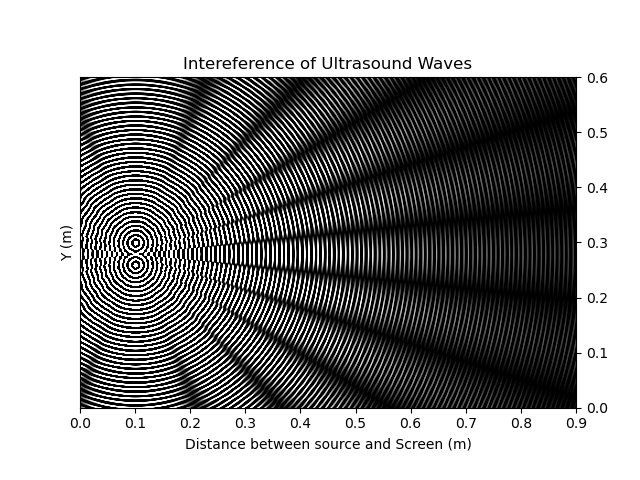

In [20]:
fig, ax = plt.subplots()
ax.imshow(s_grid[0], cmap = 'gray', extent= [0, 0.9, 0, 0.6],  vmin = 0, vmax = 10)
ax.set_xlabel('Distance between source and Screen (m)')
ax.set_ylabel('Y (m)')
ax.set_title('Intereference of Ultrasound Waves')
#ax.text(0.01, 0.2, 'Two sources', color = 'k', font = 'bold')
ax.yaxis.tick_right() 
plt.show()

<IPython.core.display.Javascript object>


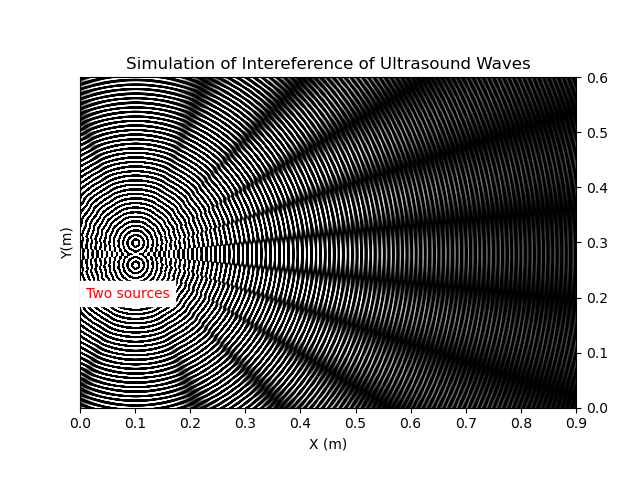

In [21]:
%matplotlib notebook
fig, ax = plt.subplots()

a = s_grid[0]
im = ax.imshow(a, cmap = 'gray', extent= (0, 0.9, 0, 0.6),  vmin = 0, vmax = 10)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y(m)')
ax.yaxis.tick_right() 
ax.text(0.01, 0.2, 'Two sources', color = 'red', backgroundcolor = 'white')
ax.set_title('Simulation of Intereference of Ultrasound Waves')

def animate(i):
    im.set_array(s_grid[i])
    return [im]

anim = FuncAnimation(fig,  animate, frames = 100, interval = 50, repeat = False)  # interval in milliseconds

#### Comparison with measurements
Now we show measured data of dark fringes, and compare them with simulation results. The experimental values of dark fringes exists at following positions: *0.01, 0.2, 0.36 and 0.55 m* on the screen.   

In [11]:
q = np.zeros([100,300])
for j in range(100):
    q[j] = s_grid[j, :, -1]

In [12]:
q = np.flip(q)
q2 = np.sqrt(sum(q**2)/300)
q31, q32 = np.meshgrid(np.ones(50), q2) 

<IPython.core.display.Javascript object>


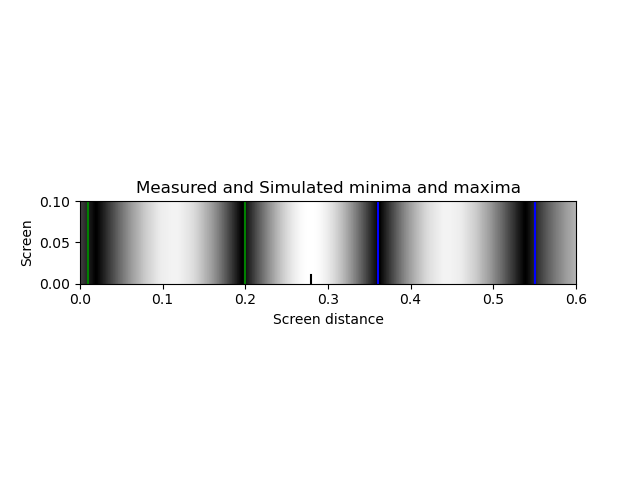

In [13]:
fig, ax = plt.subplots()
ax.imshow(q32.T, cmap = 'gray', extent = [0, 0.6, 0, 0.1])
ax.plot([0.28, 0.28], [0, 0.01], 'k')
ax.set_xlabel('Screen distance')
ax.set_title('Measured and Simulated minima and maxima')
ax.set_ylabel('Screen')
ax.plot([0.36, 0.36], [0, 0.1], 'blue')
ax.plot([0.55, 0.55], [0, 0.1], 'blue')
ax.plot([0.01, 0.01], [0, 0.1], 'green')
ax.plot([0.2, 0.2], [0, 0.1], 'green')
plt.show()